In [72]:
%matplotlib inline

# Import necessary packages
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('seaborn-darkgrid')

In [73]:
df = pd.read_excel('UW_TCMDC_all_screened.xlsx')
print df.head()
print df.info
print df.dtypes

       TCMDC ID Our scaffold  Molecular framework cluster # (Gamo 2010)  \
0  TCMDC-123456          NaN                                        NaN   
1  TCMDC-123457          NaN                                        NaN   
2  TCMDC-123458          NaN                                        NaN   
3  TCMDC-123459          NaN                                        NaN   
4  TCMDC-123460          NaN                                        NaN   

   Fingerprint cluster # (Gamo 2010) Target hypothesis (Gamo 2010)  \
0                                NaN                           NaN   
1                                NaN                           NaN   
2                                NaN                           NaN   
3                                NaN                           NaN   
4                                NaN                           NaN   

   CDPK1 IC50, uM  CDPK4 IC50, uM  PK6 IC50, uM  PK7 IC50, uM     CHEMBL ID  \
0             NaN             NaN           NaN  

Drop the column "Unnamed: 25" - since that is erroneous. The 'synonyms' column also has only 4 entries - so we will drop that too. The "PCT_INHIB_HEPG2" column is duplicated, so we will drop one of them.
Also, we'll rename the columns to make the dataframe easier to work with.

In [74]:
df.drop(labels = ['Unnamed: 25', 'SYNONYMS', 'PCT_INHIB_HEPG2'], axis = 1, inplace = True)
df.rename(columns={'MW_FREEBASE (molecular weight)': 'MW_FREEBASE',\
                   'ALOGP (logarithm of octanol/water partition coefficient)': 'ALOGP',\
                   'HBA (hydrogen bond acceptors)': 'HBA',\
                   'HBD (hydrogen bond donors)': 'HBD',\
                   'PSA (polar surface area, Angstroms^2)': 'PSA',\
                   'RTB (rotatable bonds)': 'RTB',\
                   "RO3_PASS (passes Congreve's Rule of 3 for fragment-based drug discovery?)": 'RO3_PASS',\
                   'NUM_RO5_VIOLATIONS  (# of Lipinski "Rule of 5" violations)': 'NUM_RO5_VIOLATIONS',\
                   'MED_CHEM_FRIENDLY (contains no undesirable R groups?)': 'MED_CHEM_FRIENDLY',\
                   'PCT_IHB_3D7 (% inhibition of P. falciparum 3D7 growth at 2 uM -- Gamo 2010)': 'PCT_IHB_3D7',\
                   'PCT_INHB_DD2 (% inhibition of P. falciparum DD2 growth at 2 uM -- Gamo 2010)': 'PCT_INHB_DD2',\
                   'PCT_INHIB_3D7_PFLDH (% inhibition of P. falciparum Lactate Dehydrogenase at 2 uM -- Gamo 2010)': 'PCT_INHIB_3D7_PFLDH',\
                   'PCT_INHIB_HEPG2 (% inhibition of HepG2 cells at 10 uM -- Gamo 2010)': 'PCT_INHIB_HEPG2',\
                   'IFI (Inhibition Frequency Index)': 'IFI'}, inplace=True)
print df.head(6)
print df.describe()
df.isnull().sum()

       TCMDC ID Our scaffold  Molecular framework cluster # (Gamo 2010)  \
0  TCMDC-123456          NaN                                        NaN   
1  TCMDC-123457          NaN                                        NaN   
2  TCMDC-123458          NaN                                        NaN   
3  TCMDC-123459          NaN                                        NaN   
4  TCMDC-123460          NaN                                        NaN   
5  TCMDC-123461          NaN                                        NaN   

   Fingerprint cluster # (Gamo 2010) Target hypothesis (Gamo 2010)  \
0                                NaN                           NaN   
1                                NaN                           NaN   
2                                NaN                           NaN   
3                                NaN                           NaN   
4                                NaN                           NaN   
5                                NaN                  

TCMDC ID                                         0
Our scaffold                                 13255
Molecular framework cluster # (Gamo 2010)    13226
Fingerprint cluster # (Gamo 2010)            13226
Target hypothesis (Gamo 2010)                13331
CDPK1 IC50, uM                               13270
CDPK4 IC50, uM                               13396
PK6 IC50, uM                                 13386
PK7 IC50, uM                                 13449
CHEMBL ID                                        0
pXC50_3D7                                      115
MW_FREEBASE                                      0
ALOGP                                            0
HBA                                              0
HBD                                              0
PSA                                              0
RTB                                              0
RO3_PASS                                         0
NUM_RO5_VIOLATIONS                               0
MED_CHEM_FRIENDLY              

As a first pass, let's visualize some of the columns to get a sense of the <em>distribution</em> of the data.

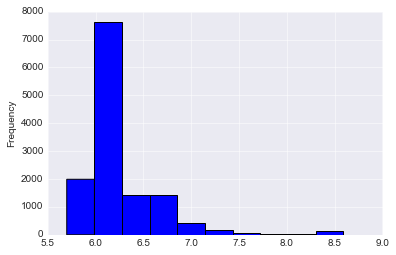

In [75]:
df['pXC50_3D7'].plot(kind = 'hist')

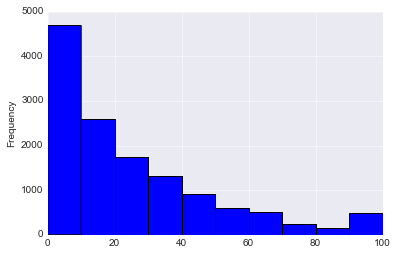

In [76]:
df['PCT_INHIB_HEPG2'].plot(kind = 'hist')

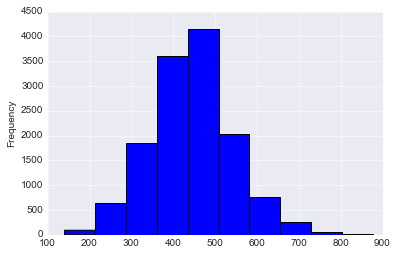

In [63]:
df['MW_FREEBASE'].plot(kind = 'hist')

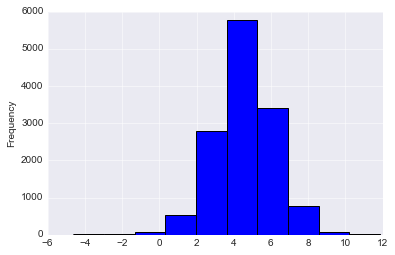

In [64]:
df['ALOGP'].plot(kind = 'hist')

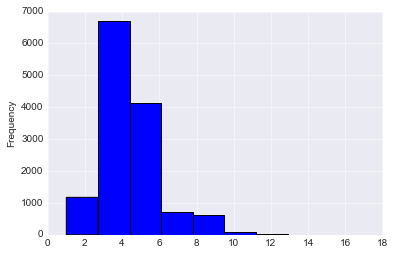

In [65]:
df['HBA'].plot(kind = 'hist')

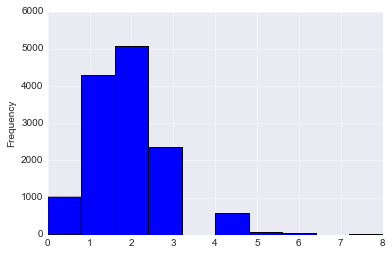

In [66]:
df['HBD'].plot(kind = 'hist')

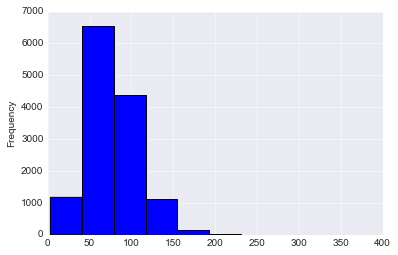

In [67]:
df['PSA'].plot(kind = 'hist')

In [40]:
df['MED_CHEM_FRIENDLY'].value_counts()

Y    11759
N     1692
Name: MED_CHEM_FRIENDLY, dtype: int64

In [41]:
df['NUM_RO5_VIOLATIONS'].value_counts()

0    7238
1    3726
2    2430
3      54
4       3
Name: NUM_RO5_VIOLATIONS, dtype: int64

In [42]:
df['RO3_PASS'].value_counts()

N    13375
Y       76
Name: RO3_PASS, dtype: int64

In [49]:
df['RTB'].value_counts().sort_values(ascending = True)

27       1
25       1
31       1
29       1
22       6
20      11
23      14
21      16
19      25
18      28
0       47
17      51
16      72
15     119
1      182
14     190
13     322
2      408
12     411
11     608
10     808
3      831
9      949
8     1326
4     1439
5     1700
7     1850
6     2034
Name: RTB, dtype: int64

In [54]:
print df['HBD'].value_counts()
print "------------------------"
print df['HBA'].value_counts()

2    5064
1    4305
3    2355
0    1010
4     581
5      65
6      60
8      10
7       1
Name: HBD, dtype: int64
------------------------
4     3548
3     3145
5     2529
6     1607
2     1111
7      718
8      416
9      205
10      66
1       64
12      20
11      19
15       1
13       1
18       1
Name: HBA, dtype: int64


Inital question - are the compounds that are promising leads from a structural point of view necessarily medicinally active?

In [77]:
leads_1 = df[(df.MED_CHEM_FRIENDLY == 'Y') & (df.RO3_PASS == 'Y')]
print leads_1
print leads_1.isnull().sum()

           TCMDC ID Our scaffold  Molecular framework cluster # (Gamo 2010)  \
6      TCMDC-123462          NaN                                        NaN   
33     TCMDC-123492          NaN                                        NaN   
49     TCMDC-123508          NaN                                        NaN   
380    TCMDC-123843          NaN                                        NaN   
396    TCMDC-123859          NaN                                        NaN   
465    TCMDC-123928          NaN                                        NaN   
466    TCMDC-123929          NaN                                        NaN   
470    TCMDC-123933          NaN                                        NaN   
471    TCMDC-123934          NaN                                        NaN   
474    TCMDC-123937          NaN                                        NaN   
477    TCMDC-123940          NaN                                        NaN   
478    TCMDC-123941          NaN                    

An initial pass shows... <b>No</b>. 

All 70 of the compounds that have medicinally-compatible functional groups and are promising fragments (per Congreve's "Rule of Three") are not very active!

We can try a different approach now. First, we'll select the compounds that obey Lipinski's "Rule of Five" and also have medicinally-compatible functional groups.

In [99]:
leads_2 = df[(df.NUM_RO5_VIOLATIONS == 0) & (df.MED_CHEM_FRIENDLY == 'Y')]
print leads_2[(leads_2['PCT_IHB_3D7'].notnull()) & (leads_2['PCT_INHB_DD2'].notnull()) & (leads_2['PCT_INHIB_3D7_PFLDH'].notnull()) & (leads_2['PCT_INHIB_HEPG2'].notnull())]

           TCMDC ID Our scaffold  Molecular framework cluster # (Gamo 2010)  \
1      TCMDC-123457          NaN                                        NaN   
3      TCMDC-123459          NaN                                        NaN   
5      TCMDC-123461          NaN                                        NaN   
6      TCMDC-123462          NaN                                        NaN   
7      TCMDC-123463          NaN                                        NaN   
8      TCMDC-123464          NaN                                        NaN   
9      TCMDC-123465          NaN                                        NaN   
10     TCMDC-123466          NaN                                        NaN   
11     TCMDC-123467          NaN                                        NaN   
12     TCMDC-123468          NaN                                        NaN   
15     TCMDC-123471          NaN                                        NaN   
16     TCMDC-123472          NaN                    

We're down to 6420 rows, or 50% or so of the data.

Next, we'll select those rows (molecules in this case) that show <em>complete</em> inhibition of the malaria parasites 3D7 and DD2.

In [104]:
lead_refin_1 = leads_2[(leads_2['PCT_IHB_3D7'] == 100) & (leads_2['PCT_INHB_DD2'] == 100)]

In [105]:
print lead_refin_1

           TCMDC ID Our scaffold  Molecular framework cluster # (Gamo 2010)  \
40     TCMDC-123499          NaN                                        NaN   
47     TCMDC-123506          NaN                                        NaN   
73     TCMDC-123532          NaN                                        NaN   
214    TCMDC-123673          NaN                                        NaN   
248    TCMDC-123707          NaN                                        NaN   
255    TCMDC-123714          NaN                                        NaN   
263    TCMDC-123722          NaN                                        NaN   
270    TCMDC-123729          NaN                                        NaN   
281    TCMDC-123740          NaN                                        NaN   
452    TCMDC-123915          NaN                                        NaN   
456    TCMDC-123919          NaN                                        NaN   
508    TCMDC-123971          NaN                    

Ok, down to 231 molecules. 

,TCMDC ID,Our scaffold,Molecular framework cluster # (Gamo 2010),Fingerprint cluster # (Gamo 2010),Target hypothesis (Gamo 2010),"CDPK1 IC50, uM","CDPK4 IC50, uM","PK6 IC50, uM","PK7 IC50, uM",CHEMBL ID,...,RTB,RO3_PASS,NUM_RO5_VIOLATIONS,MED_CHEM_FRIENDLY,PCT_IHB_3D7,PCT_INHB_DD2,PCT_INHIB_3D7_PFLDH,PCT_INHIB_HEPG2,IFI,SMILES
40,TCMDC-123499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL579905,...,3,N,0,Y,100,100.0,2,38.0,4.41,CCN1CCCC(C1)Nc2ccnc3c2cc4ccccc4c3
47,TCMDC-123506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL529590,...,4,N,0,Y,100,100.0,0,15.0,7.97,COc1cc(ccc1O)C=NNc2ccnc3c2ccc(c3)Cl
73,TCMDC-123532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL534146,...,3,N,0,Y,100,100.0,0,10.0,9.09,c1ccc2c(c1)c(nc(n2)Nc3ccc(cc3)O)N4CCCC4.Cl
214,TCMDC-123673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL534832,...,4,N,0,Y,100,100.0,0,43.0,15.79,c1cc(cc(c1)NC(=O)Nc2ccc(c(c2)N(=O)=O)F)C(F)(F)F
248,TCMDC-123707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL547238,...,4,N,0,Y,100,100.0,5,0.0,2.13,c1cc(c(cc1C(F)(F)F)NC(=O)C(Cl)(Cl)Cl)N2CCOCC2
255,TCMDC-123714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL530496,...,5,N,0,Y,100,100.0,3,41.0,20.13,c1cc(ccc1NC(=O)Nc2ccc(cc2)OC(F)(F)F)N(=O)=O
263,TCMDC-123722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL524226,...,6,N,0,Y,100,100.0,0,4.0,0.71,CN(C)CCNC(=O)c1csc(n1)Nc2ccc(c(c2)Cl)Cl
270,TCMDC-123729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL530067,...,5,N,0,Y,100,100.0,0,100.0,5.17,CN(C)CCCn1c(c(c2c1nc(c(n2)C#N)C#N)c3[nH]c4cccc...
281,TCMDC-123740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL581177,...,5,N,0,Y,100,100.0,2,0.0,0.00,CC(C)Sc1nc(cnn1)c2cnnc(n2)SC(C)C
452,TCMDC-123915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL587387,...,5,N,0,Y,100,100.0,0,98.0,7.38,c1ccc2cc3c(cc2c1)c(ccn3)Nc4ccc(cc4)N5CCN(CC5)CCO
